In [ ]:
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Hyperparemters
n_epochs = 10
batche_size = 5
learning_rate = 0.001

In [ ]:
# Dataset has Python Image library of range [0,1]
# We transform them to Tensors of normalized range [-1,1]
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform = transform)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batche_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=batche_size,shuffle=False)
# train_loader.shape

100%|██████████| 170498071/170498071 [00:13<00:00, 13068776.19it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


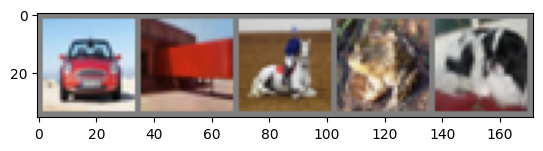

torch.Size([5, 3, 32, 32])

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
images.shape

In [ ]:
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120) #
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    # -> n, 3, 32, 32
    x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
    x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
    x = x.view(-1, 16 * 5 * 5)            # -> n, 400
    x = F.relu(self.fc1(x))               # -> n, 120
    x = F.relu(self.fc2(x))               # -> n, 84
    x = self.fc3(x)                       # -> n, 10
    return x


In [ ]:
model = ConvNet().to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{n_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)


Epoch [1/10], Step [2000/10000], Loss: 2.2589
Epoch [1/10], Step [4000/10000], Loss: 2.2856
Epoch [1/10], Step [6000/10000], Loss: 2.2259
Epoch [1/10], Step [8000/10000], Loss: 2.3176
Epoch [1/10], Step [10000/10000], Loss: 2.2275
Epoch [2/10], Step [2000/10000], Loss: 1.8848
Epoch [2/10], Step [4000/10000], Loss: 1.9868
Epoch [2/10], Step [6000/10000], Loss: 1.9497
Epoch [2/10], Step [8000/10000], Loss: 1.9481
Epoch [2/10], Step [10000/10000], Loss: 2.1311
Epoch [3/10], Step [2000/10000], Loss: 2.1250
Epoch [3/10], Step [4000/10000], Loss: 3.0460
Epoch [3/10], Step [6000/10000], Loss: 1.6085
Epoch [3/10], Step [8000/10000], Loss: 1.7777
Epoch [3/10], Step [10000/10000], Loss: 0.9818
Epoch [4/10], Step [2000/10000], Loss: 1.5025
Epoch [4/10], Step [4000/10000], Loss: 0.7837
Epoch [4/10], Step [6000/10000], Loss: 2.0266
Epoch [4/10], Step [8000/10000], Loss: 1.3780
Epoch [4/10], Step [10000/10000], Loss: 1.4125
Epoch [5/10], Step [2000/10000], Loss: 1.5809
Epoch [5/10], Step [4000/10000

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(batche_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 53.33 %
Accuracy of plane: 62.3 %
Accuracy of car: 73.6 %
Accuracy of bird: 51.9 %
Accuracy of cat: 26.7 %
Accuracy of deer: 25.2 %
Accuracy of dog: 43.4 %
Accuracy of frog: 57.8 %
Accuracy of horse: 66.5 %
Accuracy of ship: 65.6 %
Accuracy of truck: 60.3 %
